In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend
from statsmodels.regression.linear_model import OLS
from scipy.signal import periodogram

## Loading data

,Year,Month,Day,Temperature
Date,,,,
1756-01-01,1756,1,1,-8.7
1756-01-02,1756,1,2,-9.2
1756-01-03,1756,1,3,-8.6
1756-01-04,1756,1,4,-7.7
1756-01-05,1756,1,5,-7.2
...,...,...,...,...
2017-12-27,2017,12,27,2.5
2017-12-28,2017,12,28,3.8
2017-12-29,2017,12,29,2.4


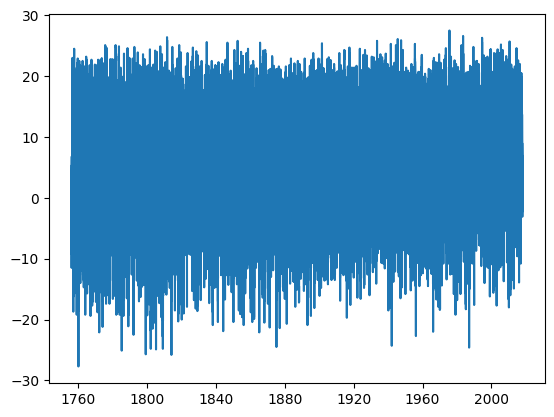

In [51]:
data=pd.read_csv("stockholm_daily_mean_temperature_1756_2017.txt",sep="\s+",header=None,usecols=[0,1,2,5],names=["Year","Month","Day","Temperature"])
data["Date"]=pd.to_datetime(data[["Year","Month","Day"]])
data.set_index("Date",inplace=True)
display(data)
plt.plot(data.index,data["Temperature"])
plt.show()


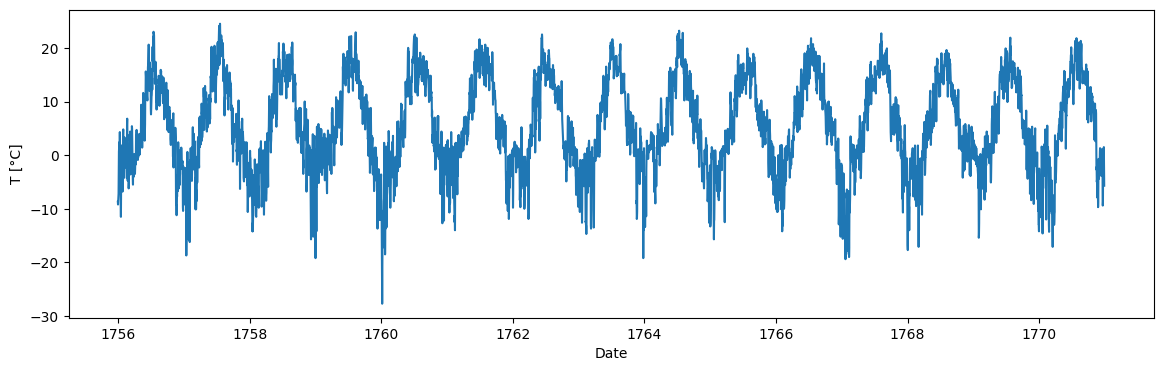

In [52]:
#Zooming in looking for periodicty
first_samples=data.head(365*15)
fig=plt.figure(figsize=(14,4))
plt.plot(first_samples.index,first_samples["Temperature"])
plt.xlabel("Date")
plt.ylabel(r"T [°C]")
plt.savefig("A_series")
plt.show()

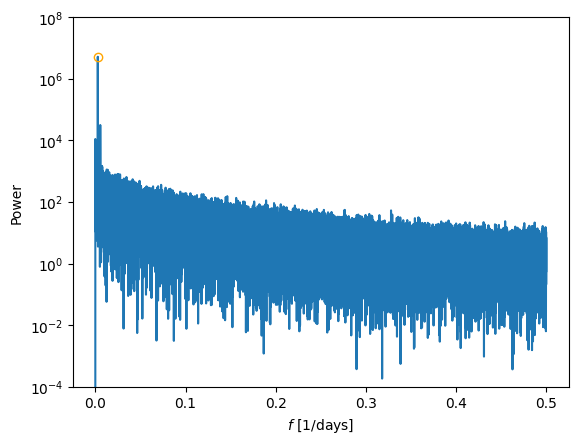

The peak is at 0.0027378937028444835 which corresponds to a period of 365.2442748091603 days.


In [53]:

f, px =periodogram(data["Temperature"])
plt.plot(f,px)
plt.yscale("log")
plt.ylim([1E-4,1E8])
max_p=np.max(px)
max_f=f[np.argmax(px)]
plt.plot(max_f,max_p,'o',markerfacecolor='none',markeredgecolor='orange')
plt.ylabel("Power")
plt.xlabel(r"$f$ [1/days]")
plt.show()
print("The peak is at",max_f,"which corresponds to a period of",1/max_f,"days.")


## Cleaning the data

0.004533462821696865
5.2211762363434


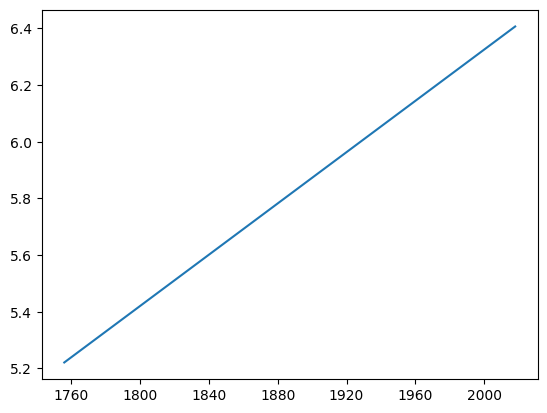

In [54]:
#Removing linear trend
data_detrended=detrend(data["Temperature"],order=1)
#We can see the linear model by
trend=data["Temperature"]-data_detrended
trend_coefficient = trend["1757-1-1"] -  trend["1756-1-1"]
trend_const = trend.iloc[0]
print(trend_coefficient)
print(trend_const)
plt.plot(trend.index,trend)
plt.show()

In [55]:
seas_decompose_4_years=seasonal_decompose(data_detrended,period=365*4+1,filt=np.zeros(1000),extrapolate_trend=1)
seas_decompose_1_year=seasonal_decompose(data_detrended,period=365,filt=np.zeros(1000),extrapolate_trend=1)

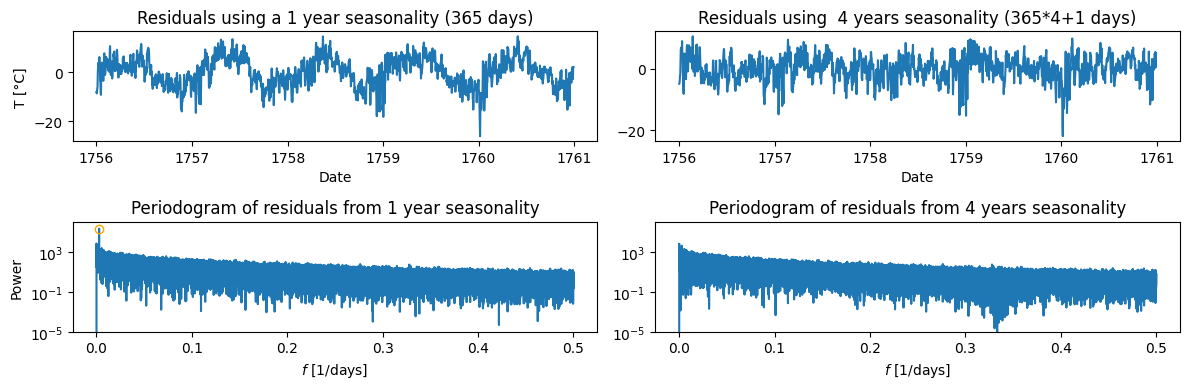

In [56]:
fig,axs=plt.subplots(2,2,figsize=(12,4))
axs[0,0].plot(seas_decompose_1_year.resid.head(365*5).index,seas_decompose_1_year.resid.head(365*5))
axs[0,0].set_title("Residuals using a 1 year seasonality (365 days)")
axs[0,0].set_ylabel(r"T [°C]")
axs[0,0].set_xlabel(r"Date")
axs[0,1].plot(seas_decompose_4_years.resid.head(365*5).index,seas_decompose_4_years.resid.head(365*5))
axs[0,1].set_title("Residuals using  4 years seasonality (365*4+1 days)")
axs[0,1].set_xlabel(r"Date")
f, px =periodogram(seas_decompose_1_year.resid)
axs[1,0].plot(f,px)
axs[1,0].set_title("Periodogram of residuals from 1 year seasonality")
axs[1,0].set_yscale("log")
axs[1,0].set_ylim([1E-5,1E6])
max_p=np.max(px)
max_f=f[np.argmax(px)]
axs[1,0].plot(max_f,max_p,'o',markerfacecolor='none',markeredgecolor='orange')
axs[1,0].set_ylabel("Power")
axs[1,0].set_xlabel(r"$f$ [1/days]")
f, px =periodogram(seas_decompose_4_years.resid)
axs[1,1].plot(f,px)
axs[1,1].set_title("Periodogram of residuals from 4 years seasonality")
axs[1,1].set_yscale("log")
axs[1,1].set_ylim([1E-5,1E6])
axs[1,1].set_xlabel(r"$f$ [1/days]")
fig.tight_layout()
plt.savefig("A_periods")
plt.show()

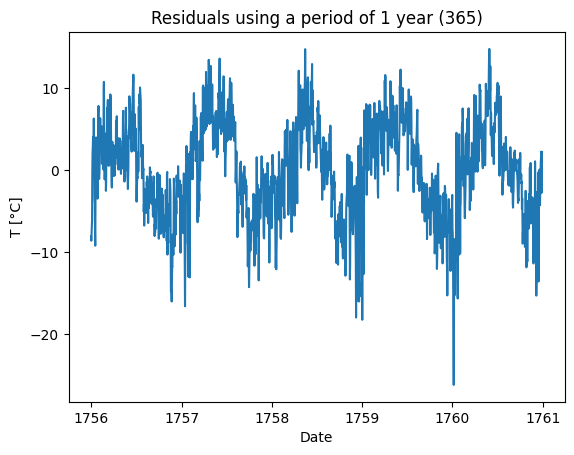

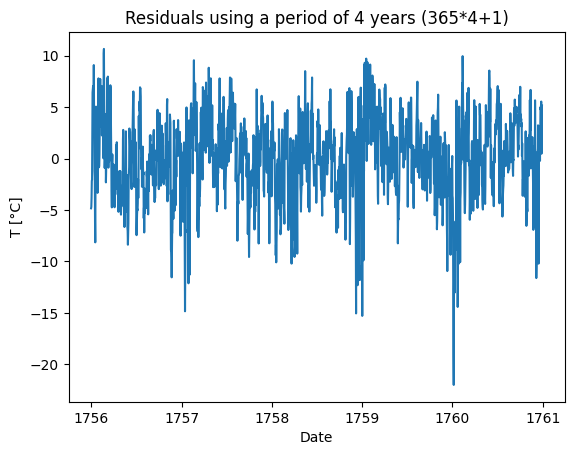

In [57]:
plt.plot(seas_decompose_1_year.resid.head(365*5).index,seas_decompose_1_year.resid.head(365*5))
plt.title("Residuals using a period of 1 year (365)")
plt.xlabel("Date")
plt.ylabel(r"T [°C]")
plt.show()
plt.plot(seas_decompose_4_years.resid.head(365*5).index,seas_decompose_4_years.resid.head(365*5))
plt.title("Residuals using a period of 4 years (365*4+1)")
plt.xlabel("Date")
plt.ylabel(r"T [°C]")
plt.show()

363.8555133079848


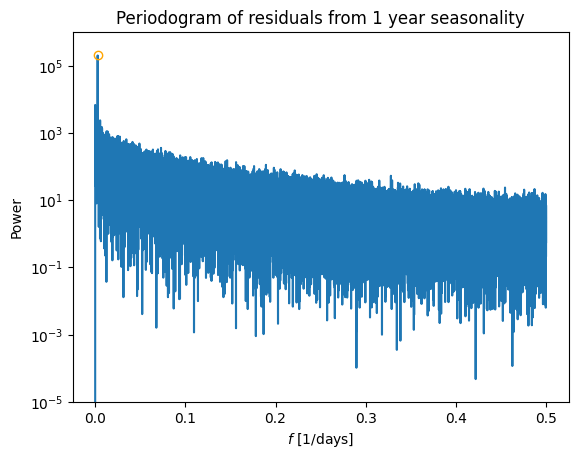

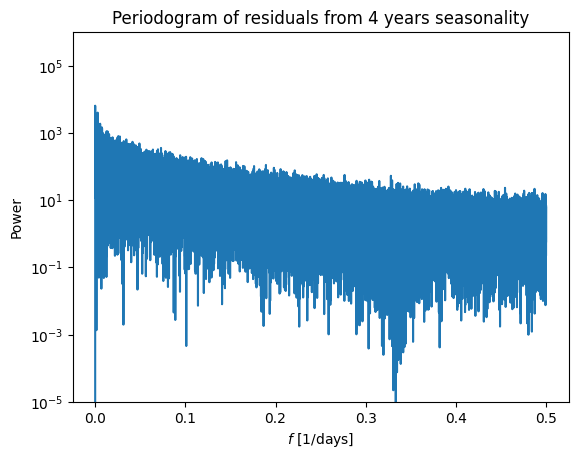

In [58]:
f, px =periodogram(seas_decompose_1_year.resid)
plt.plot(f,px)
plt.title("Periodogram of residuals from 1 year seasonality")
plt.yscale("log")
plt.ylim([1E-5,1E6])
max_p=np.max(px)
max_f=f[np.argmax(px)]
print(1/max_f)
plt.plot(max_f,max_p,'o',markerfacecolor='none',markeredgecolor='orange')
plt.ylabel("Power")
plt.xlabel(r"$f$ [1/days]")
plt.show()
f, px =periodogram(seas_decompose_4_years.resid)
plt.plot(f,px)
plt.title("Periodogram of residuals from 4 years seasonality")
plt.yscale("log")
plt.ylim([1E-5,1E6])
plt.ylabel("Power")
plt.xlabel(r"$f$ [1/days]")
plt.show()

In [59]:
data_cleaned=seas_decompose_4_years.resid

## Fitting ARMA Models

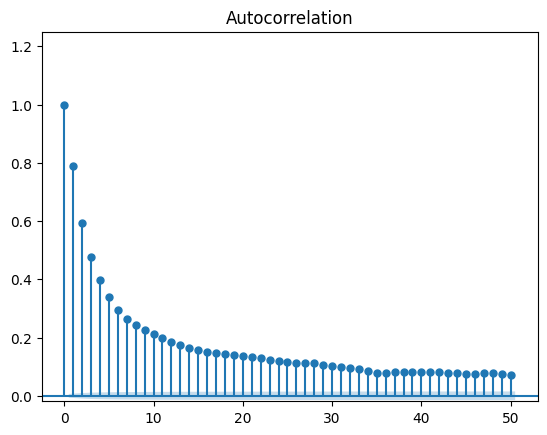

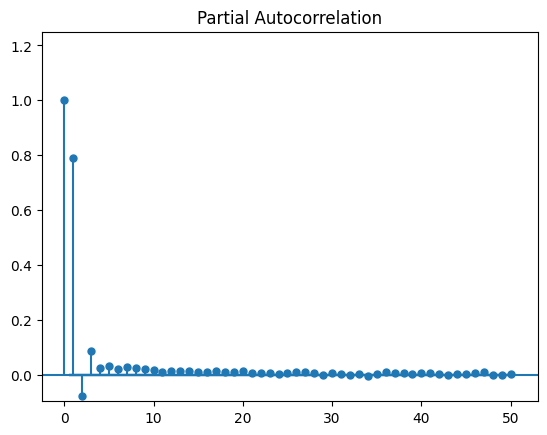

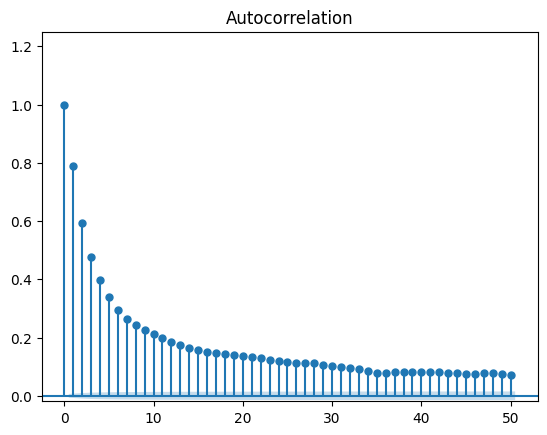

In [60]:
# TODO

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from pmdarima import auto_arima

##Plot the acf and pacf to determine the order
plot_pacf(data_cleaned, alpha = 0.05, auto_ylims = True)
plot_acf(data_cleaned, alpha = 0.05, auto_ylims= True)
##The ACF decays geometrically, indicating that an ARMA model is suitable for fitting

In [ ]:
maxp=3
maxq=3

aiccs=np.zeros((maxp+1,maxq+1)) 
aics=np.zeros((maxp+1,maxq+1)) 
bics=np.zeros((maxp+1,maxq+1)) 

for p in range(0,maxp+1):
  for q in range(0,maxq+1):
    model = ARIMA(data_cleaned, order=(p, 0 ,q)).fit(method= "innovations_mle")
    
    aiccs[p-1,q-1]=model.aicc
    aics[p-1,q-1]=model.aic
    bics[p-1,q-1]=model.bic

'''
ind = np.argmin(aiccs)
model = ARIMA(data_cleaned, order= orders[ind]).fit(method= "innovations_mle")
print(aiccs)
print(orders)
print(orders[ind])
'''

In [31]:
print(aiccs)
print(aics)
print(bics)

[[429484.33596239 428889.02015596 428716.41869521 430191.85544694]
 [429186.07433887 428343.1018601  428254.75583228 429630.31145459]
 [428495.4494437  428272.05081587 428249.0673179  428869.70437322]
 [462141.1299214  443902.53604167 436884.49625021 523351.92284316]]
[[429484.33554437 428889.01952893 428716.41781735 430191.85519613]
 [429186.07371183 428343.10098224 428254.75466178 429630.31103657]
 [428495.44856584 428272.04964537 428249.06581296 428869.70374618]
 [462141.12967059 443902.53562364 436884.49562318 523351.92271776]]
[[429522.21118789 428936.36408332 428773.23128262 430220.26192877]
 [429233.41826623 428399.91444752 428321.03703794 429668.18668009]
 [428552.26203111 428338.33202153 428324.81709999 428917.04830058]
 [462169.53640323 443940.41126716 436931.84017757 523370.86053952]]


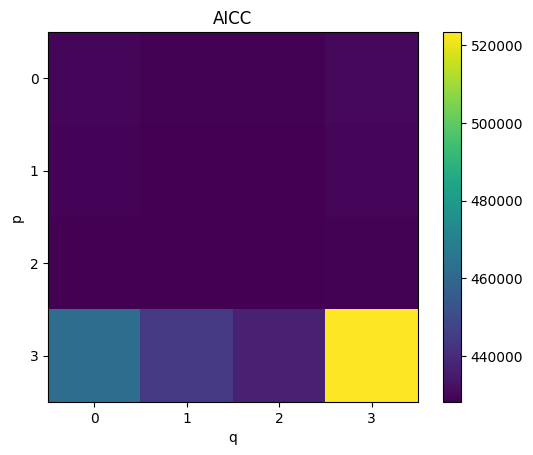

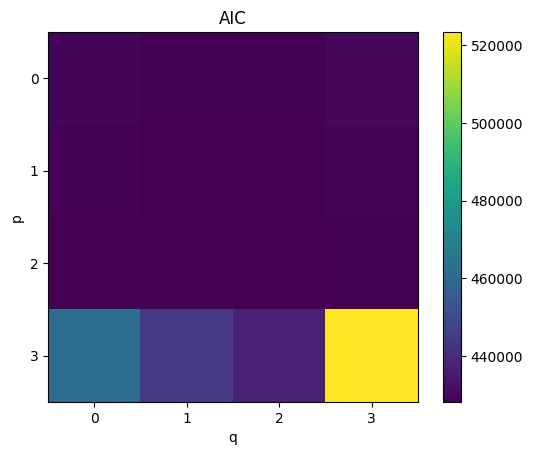

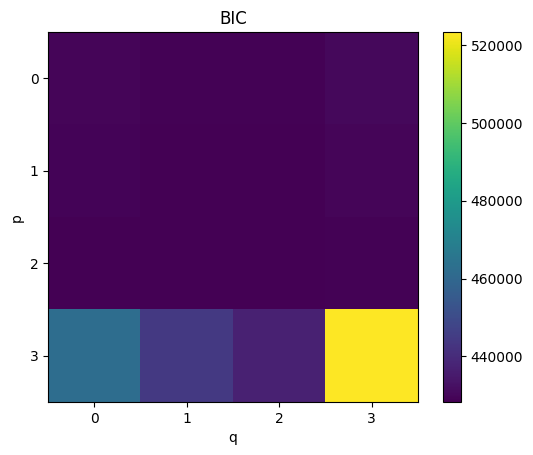

In [32]:
plt.imshow(aiccs,vmin=aiccs.min(),vmax=aiccs.max())
plt.yticks(range(maxp+1),range(maxp+1))
plt.xticks(range(maxq+1),range(maxq+1))
plt.colorbar()
plt.title("AICC")
plt.xlabel("q")
plt.ylabel("p")
plt.show()
plt.imshow(aics,vmin=aics.min(),vmax=aics.max())
plt.yticks(range(maxp+1),range(maxp+1))
plt.xticks(range(maxq+1),range(maxq+1))
plt.colorbar()
plt.title("AIC")
plt.xlabel("q")
plt.ylabel("p")
plt.show()
plt.imshow(bics,vmin=bics.min(),vmax=bics.max())
plt.yticks(range(maxp+1),range(maxp+1))
plt.xticks(range(maxq+1),range(maxq+1))
plt.colorbar()
plt.title("BIC")
plt.xlabel("q")
plt.ylabel("p")
plt.show()

In [6]:
# best_params=np.unravel_index(np.argmin(aiccs), aiccs.shape)
best_params = (2, 2)
print("Best params:  p =",best_params[0],",  q =",best_params[1])
best_model=ARIMA(data_cleaned, order=(best_params[0], 0 ,best_params[1])).fit(method= "innovations_mle")
print("Best params using innovations")
print("ar:",best_model.arparams)
print("ma:",best_model.maparams)

Best params:  p = 2 ,  q = 2


c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Program Files\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Best params using innovations
ar: [ 1.5705935  -0.58628246]
ma: [-0.71954142 -0.16864529]


In [7]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  resid   No. Observations:                95694
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -214165.550
Date:                Thu, 25 Apr 2024   AIC                         428343.101
Time:                        12:59:39   BIC                         428399.914
Sample:                    01-01-1756   HQIC                        428360.377
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.054      0.018      0.986      -0.105       0.106
ar.L1          1.5706      0.007    220.027      0.000       1.557       1.585
ar.L2         -0.5863      0.006    -94.257      0.000      -0.598      -0.574
ma.L1         -0.7195      0.007    -99.504      0.000      -0.734      -0.705
ma.L2         -0.1686      0.003    -51.389      0.000      -0.175      -0.162
sigma2         5.1457      0.018    285.141      0.000       5.110       5.181
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):             12225.71
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

In [8]:
seasonal = seas_decompose_4_years.seasonal
def forecast_in(start, end):
	period = 365 * 4 + 1
	forecasts = best_model.get_prediction(start = start, end = end-1).summary_frame()
	forecasts['seasonal']  = np.tile(seasonal[start%period : start%period + period].to_numpy(), int((end - start) / period) + 1 )[0 : end - start]
	forecasts['trend'] = trend_const + trend_coefficient * np.arange(start, end)
	forecasts['stationary'] = forecasts['mean']
	forecasts['mean'] += forecasts['seasonal'] + forecasts['trend']
	forecasts['mean_ci_lower'] += forecasts['seasonal'] + forecasts['trend']
	forecasts['mean_ci_upper'] += forecasts['seasonal'] + forecasts['trend']
	return forecasts

def forecast_out(n):
	period = 365 * 4 + 1
	forecasts = best_model.get_forecast(n).summary_frame()
	start = len(data)
	end = start + n
	forecasts['seasonal']  = np.tile(seasonal[start%period : start%period + period].to_numpy(), int((end - start) / period) + 1 )[0 : end - start]
	forecasts['trend'] = trend_const + trend_coefficient * np.arange(start, end)
	forecasts['stationary'] = forecasts['mean']
	forecasts['mean'] += forecasts['seasonal'] + forecasts['trend']
	forecasts['mean_ci_lower'] += forecasts['seasonal'] + forecasts['trend']
	forecasts['mean_ci_upper'] += forecasts['seasonal'] + forecasts['trend']
	return forecasts

In [9]:
forecasts = forecast_out(1000)

C:\Users\Xindi Liu\AppData\Local\Temp\ipykernel_13992\733273430.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


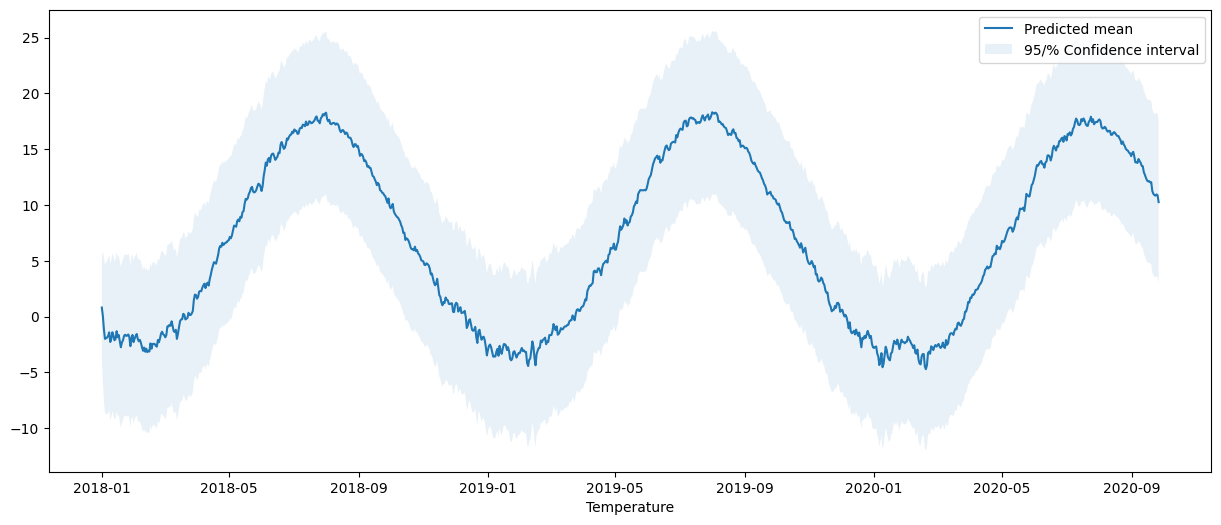

In [22]:
fig = plt.figure(figsize=(15, 6))
plt.plot(forecasts.index, forecasts['mean'])
plt.fill_between(forecasts.index, forecasts['mean_ci_lower'],forecasts['mean_ci_upper'], alpha = 0.1)
plt.legend(['Predicted mean', '95/% Confidence interval'])
plt.xlabel('Date')
plt.xlabel('Temperature')
fig.show()